<a href="https://colab.research.google.com/github/Vanianatalie0245/DiabetesPrediction/blob/main/Titanic_EDA_and_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA (EXPLANATORY DATA ANALYSIS)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Printing the data set
df_2 = pd.read_csv("/content/drive/MyDrive/train.csv")
df_2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Printing dataset info (column name and type)
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
display(df_2.describe())

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The .describe() feature map out the count of each numerical data to help distinguish the occurence of missing data in the dataset, as seen from the Age column with only 714 data out of 891 data. Apart from age, all numerical column doesn't have missing value. Apart from that, it also count the mean, the standard deviation, the minimal and maximum data, and the quartile range (the first, second, and the third quartile)

In [ ]:
#Survivability Count
print(df_2['Survived'].value_counts())

Survived
0    549
1    342
Name: count, dtype: int64


In [ ]:
#Age info
print(df_2['Age'].describe())

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


In [ ]:
#Gender count
print(df_2['Sex'].value_counts())

Sex
male      577
female    314
Name: count, dtype: int64


In [ ]:
#Class count
print(df_2['Pclass'].value_counts())

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [ ]:
#Embark count
print(df_2['Embarked'].value_counts())

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [ ]:
#Sibling Spuse count
print(df_2['SibSp'].value_counts())

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


In [ ]:
#Parent Child Count
print(df_2['Parch'].value_counts())

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


In [ ]:
#Fare info
print(df_2['Fare'].describe())

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


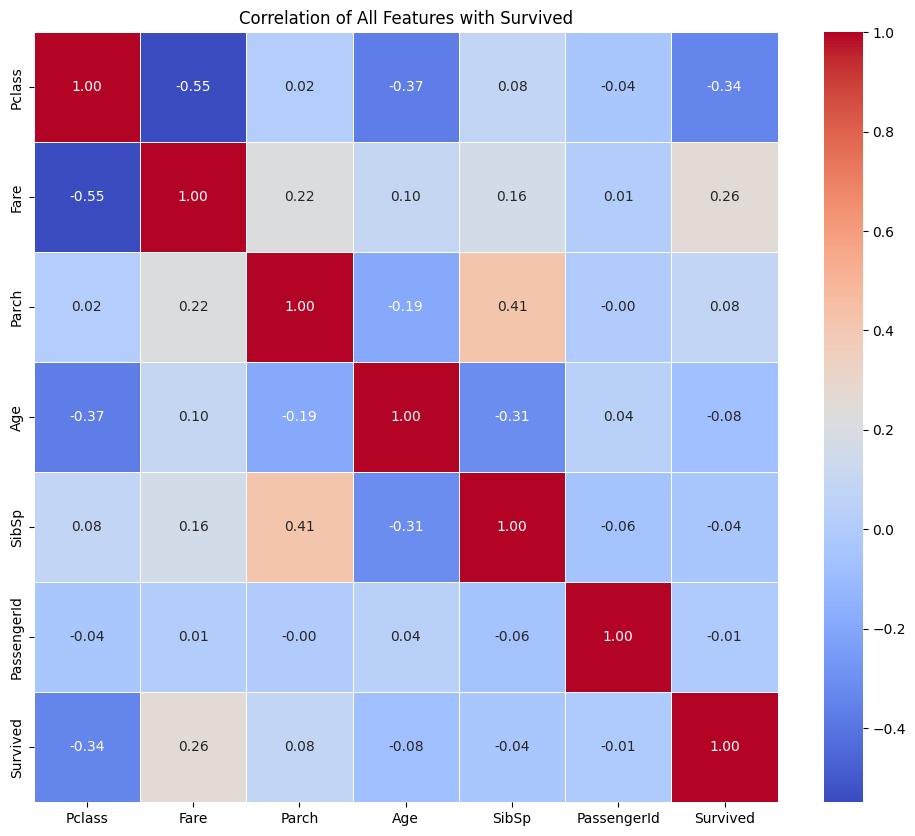

In [ ]:
#Counting the correlation of Numerical Category to Survived

corr_matrix = df_2.select_dtypes(include=['number']).corr()

saleprice_corr = corr_matrix['Survived'].abs().sort_values(ascending=False)

saleprice_corr = saleprice_corr.drop('Survived')

all_features = saleprice_corr.index.tolist()

sub_corr_matrix = corr_matrix.loc[all_features + ['Survived'], all_features + ['Survived']]

plt.figure(figsize=(12, 10))
sns.heatmap(sub_corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")

plt.title("Correlation of All Features with Survived")
plt.show()


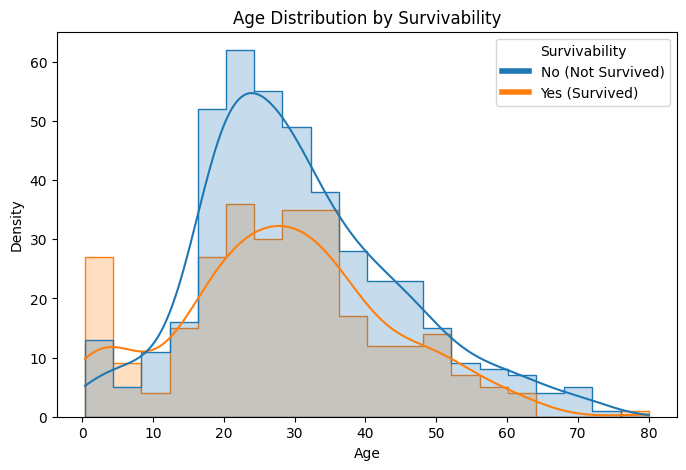

In [ ]:
#See the survived or not survived distribution based on age

df_selected_Age = df_2[["Age", "Survived"]]

df_selected_Age = df_selected_Age.apply(pd.to_numeric, errors='coerce')

df_selected_Age.dropna(inplace=True)

df_selected_Age["Survived"] = df_selected_Age["Survived"].astype(int)


palette = {0: "#1f77b4", 1: "#ff7f0e"}

plt.figure(figsize=(8, 5))
ax = sns.histplot(
    data=df_selected_Age,
    x="Age",
    hue="Survived",
    bins=20,
    kde=True,
    element="step",
    palette=palette
)

handles = [plt.Line2D([0], [0], color=palette[0], lw=4),
           plt.Line2D([0], [0], color=palette[1], lw=4)]
labels = ["No (Not Survived)", "Yes (Survived)"]
plt.legend(handles, labels, title="Survivability")
plt.title("Age Distribution by Survivability")

plt.xlabel("Age")
plt.ylabel("Density")

plt.show()



In [ ]:
#Counting the exact value of the survivors and non-survivors based on each age group
bins = list(range(0, 90, 10))
labels = [f"{i}-{i+10}" for i in range(0, 80, 10)]

df_selected_Age ['AgeGroup'] = pd.cut(df_selected_Age ['Age'], bins=bins, labels=labels, right=False)
survivor_counts = df_selected_Age [df_selected_Age ['Survived'] == 1].groupby('AgeGroup').size()
non_survivor_counts = df_selected_Age [df_selected_Age ['Survived'] == 0].groupby('AgeGroup').size()

print("Survivor count based on age group")
print(survivor_counts)
print("\n")
print("Non-survivor count based on age group")
print(non_survivor_counts)

Survivor count based on age group
AgeGroup
0-10     38
10-20    41
20-30    77
30-40    73
40-50    34
50-60    20
60-70     6
70-80     0
dtype: int64


Non-survivor count based on age group
AgeGroup
0-10      24
10-20     61
20-30    143
30-40     94
40-50     55
50-60     28
60-70     13
70-80      6
dtype: int64


<ipython-input-401-f0442757dfa0>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survivor_counts = df_selected_Age [df_selected_Age ['Survived'] == 1].groupby('AgeGroup').size()
<ipython-input-401-f0442757dfa0>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  non_survivor_counts = df_selected_Age [df_selected_Age ['Survived'] == 0].groupby('AgeGroup').size()


From the data above we can distinguish the rate of survived and non survived passangers based on age. The age group that dominate the passangers is between the age group of 20-30 with 220 passangers. Among the age group 77 survived (35%) and 143 not survived (65%). The data may also show the prioritization in rescue effort with children age 0-10 being the class with more survived case than non-survived case. This can means that they are more highly prioritized. Meanwhile, the lowest prioritization can be seen on the 70-80 age group with 100% of non-survival rates.

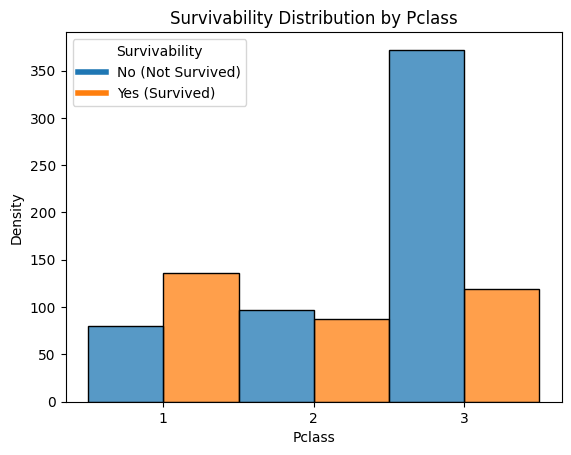

In [ ]:
#See the survived or not survived distribution based on Pclass

df_selected_Class = df_2[["Pclass", "Survived"]]

df_selected_Class = df_selected_Class.apply(pd.to_numeric, errors='coerce')

df_selected_Class.dropna(inplace=True)

df_selected_Class["Survived"] = df_selected_Class["Survived"].astype(int)

palette = {0: "#1f77b4", 1: "#ff7f0e"}

sns.histplot(
    data=df_selected_Class,
    x="Pclass",
    hue="Survived",
    bins= 3,
    multiple= "dodge",
    discrete=True,
    palette={0: "#1f77b4", 1: "#ff7f0e"}
)

plt.xticks([1, 2, 3])

handles = [plt.Line2D([0], [0], color=palette[0], lw=4),
           plt.Line2D([0], [0], color=palette[1], lw=4)]
labels = ["No (Not Survived)", "Yes (Survived)"]
plt.legend(handles, labels, title="Survivability")
plt.title("Survivability Distribution by Pclass")

plt.xlabel("Pclass")
plt.ylabel("Density")

plt.show()


In [ ]:
#Counting the exact value of the survivors and non-survivors based on each Pclass
bins = 3
labels = [f"{i}-{i+1}" for i in range(0, 3, 1)]

df_selected_Class['ClassGroup'] = pd.cut(df_selected_Class ['Pclass'], bins=bins, labels=labels, right=False)
survivor_counts = df_selected_Class [df_selected_Class ['Survived'] == 1].groupby('Pclass').size()
non_survivor_counts = df_selected_Class [df_selected_Class ['Survived'] == 0].groupby('Pclass').size()

print("Survivor count based on class group")
print(survivor_counts)
print("\n")
print("Non-survivor count based on class group")
print(non_survivor_counts)

Survivor count based on class group
Pclass
1    136
2     87
3    119
dtype: int64


Non-survivor count based on class group
Pclass
1     80
2     97
3    372
dtype: int64


From the data above we can distinguish the rate of survived and non survived passangers based on Pclass. The age group that dominate the passangers is between the Pclass group is class 3 with a total of 491 passangers. The lowest came from the 2nd class with 184 passangers. It shows that the highest survival rate came from the class 1 with survival rate of 63%, it far exceeds the non-survived rate (37%). Meanwhile the 3rd class suffered from intense non-survived rate of 76% while the survived rate is only 24%. The 2nd class have a most stable survived and non-survived rates, with both near to 50%. This shows that the higher the price people pay for the ticket (class 1), the more the probability is to surviving than those that pay lower price (class 3)

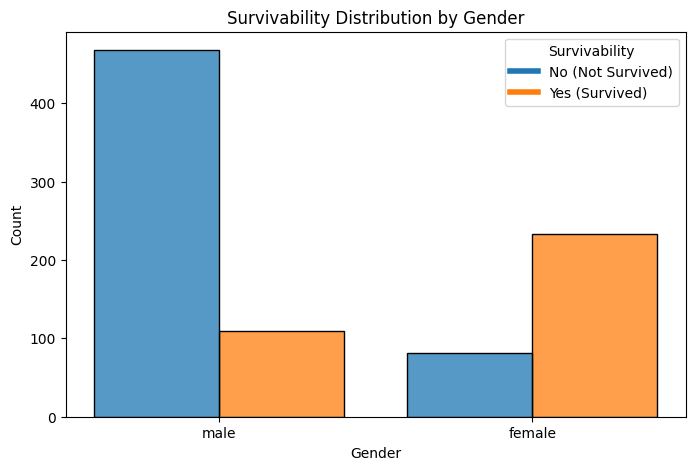

In [ ]:
#See the survived or not survived distribution based on Gender

df_selected_Gender = df_2[["Sex", "Survived"]].dropna()

palette = {0: "#1f77b4", 1: "#ff7f0e"}

plt.figure(figsize=(8, 5))
sns.histplot(
    data=df_selected_Gender,
    x="Sex",
    hue="Survived",
    bins= 2,
    discrete=True,
    shrink=0.8,
    multiple="dodge",
    palette=palette
)

handles = [plt.Line2D([0], [0], color=palette[0], lw=4),
           plt.Line2D([0], [0], color=palette[1], lw=4)]
labels = ["No (Not Survived)", "Yes (Survived)"]
plt.legend(handles, labels, title="Survivability")

plt.title("Survivability Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")

plt.show()


In [ ]:
#Counting the exact value of the survivors and non-survivors based on gender

df_selected_Gender['GenderGroup'] = df_selected_Gender['Sex'].map({'male': 'male', 'female': 'female'})

survivor_counts = df_selected_Gender[df_selected_Gender['Survived'] == 1].groupby('GenderGroup').size()
non_survivor_counts = df_selected_Gender[df_selected_Gender['Survived'] == 0].groupby('GenderGroup').size()

print("Survivor count based on gender group")
print(survivor_counts)
print("\nNon-survivor count based on gender group")
print(non_survivor_counts)

Survivor count based on gender group
GenderGroup
female    233
male      109
dtype: int64

Non-survivor count based on gender group
GenderGroup
female     81
male      468
dtype: int64


From the histogram above, it shows the relationship between survived and non-survived if being compared to gender/sex. The passanger is dominated by 'male' with counts of 577 as opposed to female with only 314. But in comparison to the survival rate, female have a high value of survival of 74% as oppose to male that only have 19% of survival rate. This data may have shown that the rescue prioritize more on the female gender than those of male in the titanic incident.

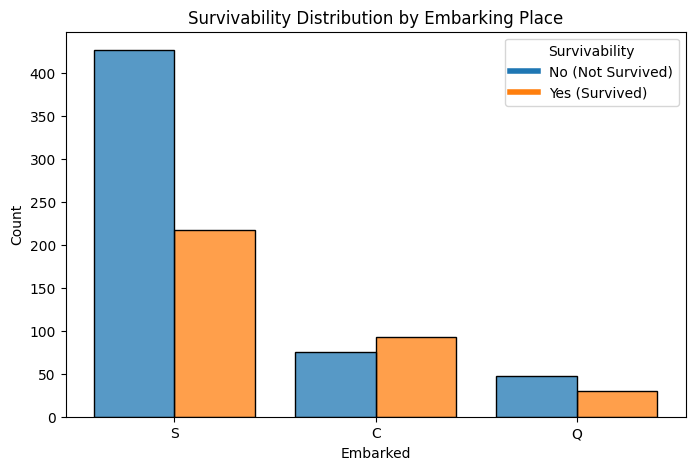

In [ ]:
#See the survived or not survived distribution based on Embarking site

df_selected_Embark = df_2[["Embarked", "Survived"]].dropna()

palette = {0: "#1f77b4", 1: "#ff7f0e"}

plt.figure(figsize=(8, 5))
sns.histplot(
    data=df_selected_Embark,
    x="Embarked",
    hue="Survived",
    bins= 2,
    discrete=True,
    shrink=0.8,
    multiple="dodge",
    palette=palette
)

handles = [plt.Line2D([0], [0], color=palette[0], lw=4),
           plt.Line2D([0], [0], color=palette[1], lw=4)]
labels = ["No (Not Survived)", "Yes (Survived)"]
plt.legend(handles, labels, title="Survivability")

plt.title("Survivability Distribution by Embarking Place")
plt.xlabel("Embarked")
plt.ylabel("Count")

plt.show()

In [ ]:
#Counting the exact value of the survivors and non-survivors based on gender

df_selected_Embark['EmbarkGroup'] = df_selected_Embark['Embarked'].map({'S': 'S', 'C': 'C', 'Q':'Q'})

survivor_counts = df_selected_Embark[df_selected_Embark['Survived'] == 1].groupby('EmbarkGroup').size()
non_survivor_counts = df_selected_Embark[df_selected_Embark['Survived'] == 0].groupby('EmbarkGroup').size()

print("Survivor count based on embarking group")
print(survivor_counts)
print("\nNon-survivor count based on embarking group")
print(non_survivor_counts)

Survivor count based on embarking group
EmbarkGroup
C     93
Q     30
S    217
dtype: int64

Non-survivor count based on embarking group
EmbarkGroup
C     75
Q     47
S    427
dtype: int64


The Histogram above showed the data of embarked site and their survival rate. The highest embarked came from S with the value of 644 passangers. But it also suffered from the highest rate of non-survived passangers of 66%. Meanwhile, the highest rate of survival came from the C group with higher survival rate (55%) than non-survival rate (45%)

# DATA PREPROCESSING

In [ ]:
df_2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Copying the dataset before processing to ensure no
df_processed = df_2.copy()
df_processed.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# NULL VALUES (MISSING DATA)

In [ ]:
#Finding the null value in each data
display(df_processed.isnull().sum())

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Dropping the "Cabin" column due to the high number missing value (>70%) since the high number of missing data will not really help the model to learn a unique pattern and can be identified using another varible = Pclass

In [ ]:
#Dropping the column of the Cabin since the NULL value is 77%. The Pclass alone can still use to predict, we don't need the actual cabin number to predict
df_processed = df_processed.drop('Cabin', axis=1)
df_processed.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Apart from the "Cabin" column, the "Age" column still have a huge amount of missing value (177). We can't immediately delete the rows since its around 19% of the data. The approach that will be used here is by seeing at the Titles (extracted from names) and the Pclass. The varying titles like Miss, Mrs, Mr, Dr, and others might help distinguish the age of the passangers. But upon reviewing the dataset, some data like 'Miss' and 'Mrs' can represent both younger and older woman, so another variable is needed. In this term, "Pclass" can help to see what age group may the passangers belong to with the assumption that higher Pclass -> higher income -> older the age.

In [ ]:
#Extracting and grouping Titles

df_processed['Title'] = df_processed['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
df_processed['Title'] = df_processed['Title'].replace({
    'Mlle': 'Miss',
    'Ms': 'Miss',
    'Mme': 'Mrs',
    'Lady': 'Noble',
    'Countess': 'Noble',
    'Sir': 'Noble',
    'Jonkheer': 'Noble',
    'Don': 'Noble',
    'Dona': 'Noble',
    'Capt': 'Officer',
    'Col': 'Officer',
    'Major': 'Officer',
    'Dr': 'Officer',
    'Rev': 'Officer'
})

print(df_processed['Title'].value_counts())


Title
Mr         517
Miss       185
Mrs        126
Master      40
Officer     18
Noble        5
Name: count, dtype: int64


In [ ]:
#Filling Age based on the Pclass and the Title

df_processed['Age'] = df_processed.groupby(['Title', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))


Using median in filling the column 'Age' because median is not as affected to outliers if compared to mean. Since the range of 'Age' in the dataset is quiet far apart infants -> elderly, to avoid extreme values from affecting each title group, it is more safe to use median

In [ ]:
print(df_processed[['Name', 'Title', 'Pclass', 'Age']])

                                                  Name    Title  Pclass   Age
0                              Braund, Mr. Owen Harris       Mr       3  22.0
1    Cumings, Mrs. John Bradley (Florence Briggs Th...      Mrs       1  38.0
2                               Heikkinen, Miss. Laina     Miss       3  26.0
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)      Mrs       1  35.0
4                             Allen, Mr. William Henry       Mr       3  35.0
..                                                 ...      ...     ...   ...
886                              Montvila, Rev. Juozas  Officer       2  27.0
887                       Graham, Miss. Margaret Edith     Miss       1  19.0
888           Johnston, Miss. Catherine Helen "Carrie"     Miss       3  18.0
889                              Behr, Mr. Karl Howell       Mr       1  26.0
890                                Dooley, Mr. Patrick       Mr       3  32.0

[891 rows x 4 columns]


In [ ]:
#Checking null numbers in age after replacing value

print(df_processed['Age'].isnull().sum())

0


# OUTLIER DETECTION

For Outliers, I look upon 4 different numerical column (Fare, Age, SibSp, and Parch)

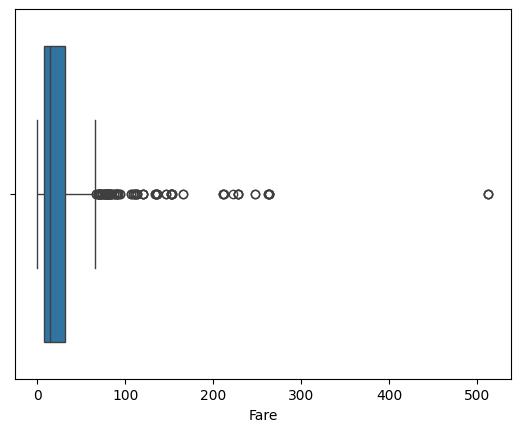

In [ ]:
#Looking for distribution of the Fare
sns.boxplot(x=df_processed['Fare'])
plt.show()

In [ ]:
#Counting the range (upper and lower bound)

Q1 = df_processed['Fare'].quantile(0.25)
Q3 = df_processed['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = max(0, Q1 - 1.5 * IQR)
upper_bound = Q3 + 1.5 * IQR

print(upper_bound)
print(lower_bound)


65.6344
0


In [ ]:
#Counting the number of outliers

outliers_fare = df_processed[(df_processed['Fare'] < lower_bound) | (df_processed['Fare'] > upper_bound)]
num_outliers = outliers_fare.shape[0]
print(f"Number of outliers in Fare: {num_outliers}")

Number of outliers in Fare: 116


From the boxplot and count above, we can see that the distribution is highly right skewed, a lot of data are far out off the upper bound value (116 data [13%]) of the 'Fare' meaning that some people pay extremely high for ticket price. This shows that there might be some anomalies in the data that can distorts the model. But we can take into account the real world case where someone might really pay such high values for a ticket. So rather than dealing with it by capping/removing the data points (which other features may be useful), the approach that is used here is to lower the significancy of the extreme data points by compressesing extremely high values and spreading out lower ones which makes the distribution more normally-distributed.

In [ ]:
#Applying log transformation to 'Fare'

df_processed['Fare'] = np.log1p(df_processed['Fare'])
df_processed.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.110213,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.280593,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.188856,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.990834,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.202765,S,Mr


In [ ]:
#Counting upper and lower bound after Log Transformation

Q1 = df_processed['Fare'].quantile(0.25)
Q3 = df_processed['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = max(0, Q1 - 1.5 * IQR)
upper_bound = Q3 + 1.5 * IQR

print(upper_bound)
print(lower_bound)

5.383513069819204
0.26944062443393046


In [ ]:
#Counting outliers after Log Transformation

outliers_fare = df_processed[(df_processed['Fare'] < lower_bound) | (df_processed['Fare'] > upper_bound)]
num_outliers = outliers_fare.shape[0]
print(f"Number of outliers in Fare: {num_outliers}")

Number of outliers in Fare: 31


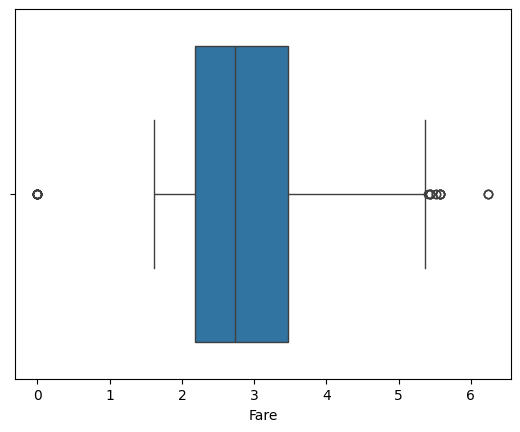

In [ ]:
#Finding outliers after log transformation

sns.boxplot(x=df_processed['Fare'])
plt.show()

In the new boxplot (after log transformation) we can see that some of the data is still acting as an outlier, but the distribution is more normally-distributed and balanced, which helps reducing the impact of extreme values in further model training. The count of the outliers dropped from 116 to 31, shows that the data is indeed more normally-distributed

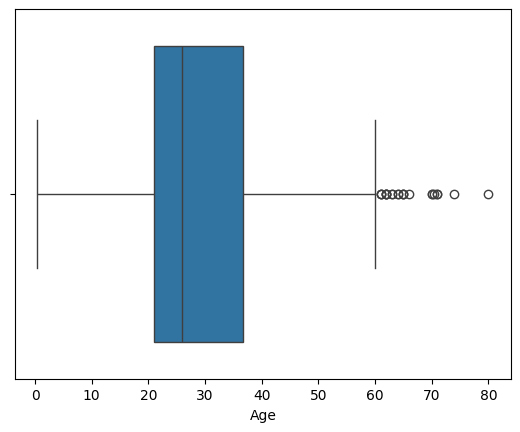

In [ ]:
#Searching for outliers in Age

sns.boxplot(x=df_processed['Age'])
plt.show()

In [ ]:
#Finding upper bound and lower bound

Q1 = df_processed['Age'].quantile(0.25)
Q3 = df_processed['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound_Age = max(0, Q1 - 1.5 * IQR)
upper_bound_Age = Q3 + 1.5 * IQR

print(upper_bound_Age)
print(lower_bound_Age)

60.375
0


In [ ]:
#Counting the number of Outlier in Age

outliers_Age= df_processed[(df_processed['Age'] < lower_bound_Age) | (df_processed['Age'] > upper_bound_Age)]
num_outliers2 = outliers_Age.shape[0]
print(f"Number of outliers in Age: {num_outliers2}")

Number of outliers in Age: 22


In this dataset, the age outliers is around 22 [2,5%] and is right skewed (large value datas) with the highest value of Age = 80 which is still an appropriate age data -> not anomalies. This is why we don't need to remove or cap the outliers because it will still be a valid data for training (introduce unique cases by representing elderly age-group)

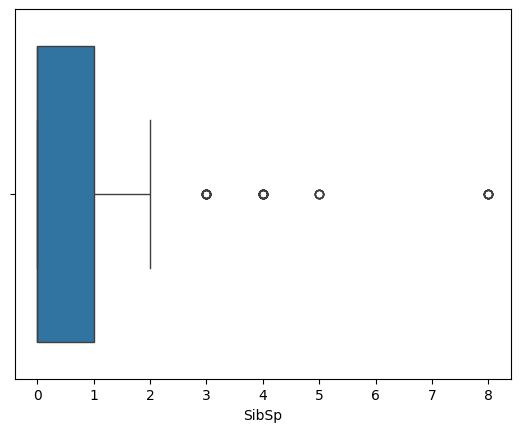

In [ ]:
#Finding outliers in the SibSp

sns.boxplot(x=df_processed['SibSp'])
plt.show()

In [ ]:
#Finding the upper bound and lower bound in SipSp

Q1 = df_processed['SibSp'].quantile(0.25)
Q3 = df_processed['SibSp'].quantile(0.75)
IQR = Q3 - Q1
lower_bound_SibSp = max(0, Q1 - 1.5 * IQR)
upper_bound_SibSp = Q3 + 1.5 * IQR

print(upper_bound_SibSp)
print(lower_bound_SibSp)

2.5
0


In [ ]:
#Counting for Outliers in SibSp

outliers_SibSp= df_processed[(df_processed['SibSp'] < lower_bound_SibSp) | (df_processed['SibSp'] > upper_bound_SibSp)]
num_outliers_SibSp = outliers_SibSp.shape[0]
print(f"Number of outliers in SibSp: {num_outliers_SibSp}")

Number of outliers in SibSp: 46


In this dataset, the SibSp outliers is around 46 [5%] and is right skewed (large value datas) with the highest value of Sibsp = 8. Like age, the data might is still an appropriate SibSp data -> not anomalies. This is why we don't need to remove or cap the outliers because it will still be a valid data for training (introduce unique cases by representing elderly age-group)

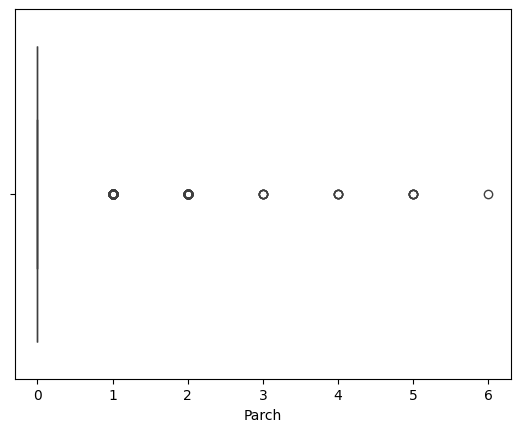

In [ ]:
#Counting for Outliers in Parch

sns.boxplot(x=df_processed['Parch'])
plt.show()

The boxplot above only shows data points. It is because out off the 891 datas of the Parch, 678 of them are 0 (traveling alone). Why does the data only shows datapoints? since the 0 dominates the data by 76%, the Q1, Q2, and Q3 is likely to also be 0. This shows that the data is highly skewed (right skewed) and the extreme values can highly increase the mean automatically. To see the distribution of the data, we can use histogram as below:

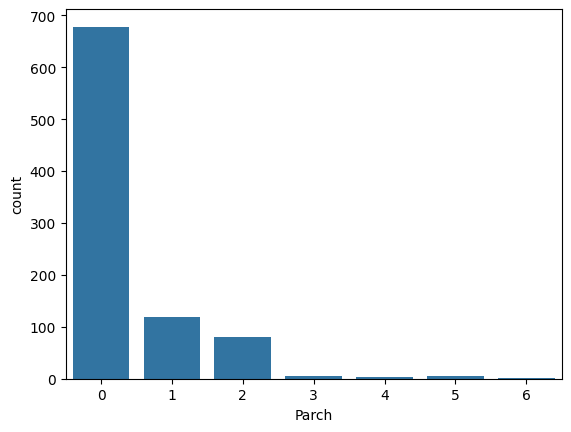

In [ ]:
#Counting for Outliers in Parch

sns.countplot(x=df_processed['Parch'])
plt.show()

In [ ]:
#Counting upper bound and lower bound

Q1 = df_processed['Parch'].quantile(0.25)
Q3 = df_processed['Parch'].quantile(0.75)
IQR = Q3 - Q1
lower_bound_Parch = max(0, Q1 - 1.5 * IQR)
upper_bound_Parch = Q3 + 1.5 * IQR

print("Upper Bound:", upper_bound_Parch)
print("Lower Bound:", lower_bound_Parch)

Upper Bound: 0.0
Lower Bound: 0


In [ ]:
#Counting Q1, Q3, IQR

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)

Q1: 0.0
Q3: 0.0
IQR: 0.0


After calculation, it is proved that the Q1, Q2, and Q3 is indeed 0, with this value, it will automatically deemed data that is lower or higher than 0 as an outlier. So we need a different approach. For this data lets consider using Z-Score for determining outliers (searching for distance between mean and standard deviation), in this dataset, the data point 3 (middle) will be used to determine outliers (if data Z-score is < - 3 or > 3)

In [ ]:
#Finding Z-score

from scipy.stats import zscore

df_processed['Parch_Z'] = zscore(df_processed['Parch'])
outliers_Parch = df_processed[abs(df_processed['Parch_Z']) > 3]
print(outliers_Parch[['Parch', 'Parch_Z']])


     Parch   Parch_Z
13       5  5.732844
25       5  5.732844
86       3  3.250237
167      4  4.491540
360      4  4.491540
437      3  3.250237
438      4  4.491540
567      4  4.491540
610      5  5.732844
638      5  5.732844
678      6  6.974147
736      3  3.250237
774      3  3.250237
858      3  3.250237
885      5  5.732844


In [ ]:
print(df_processed.groupby('Parch')['Parch_Z'].describe())

       count      mean           std       min       25%       50%       75%  \
Parch                                                                          
0      678.0 -0.473674  4.221962e-15 -0.473674 -0.473674 -0.473674 -0.473674   
1      118.0  0.767630  1.560940e-15  0.767630  0.767630  0.767630  0.767630   
2       80.0  2.008933  8.937821e-16  2.008933  2.008933  2.008933  2.008933   
3        5.0  3.250237  0.000000e+00  3.250237  3.250237  3.250237  3.250237   
4        4.0  4.491540  0.000000e+00  4.491540  4.491540  4.491540  4.491540   
5        5.0  5.732844  0.000000e+00  5.732844  5.732844  5.732844  5.732844   
6        1.0  6.974147           NaN  6.974147  6.974147  6.974147  6.974147   

            max  
Parch            
0     -0.473674  
1      0.767630  
2      2.008933  
3      3.250237  
4      4.491540  
5      5.732844  
6      6.974147  


From the description above, we can see that:

Parch = 0, 1, 2 are common and normally distributed

Parch = 3, 4, 5, 6 are outliers because the Z-score are higher than 3

This means that any value above the 0, 1, 2 will be treated as an outlier

To deal with the outliers, I will use clipping -> clip extreme values to 2

In [ ]:
#Clipping outliers

df_processed['Parch'] = df_processed['Parch'].clip(upper=2)
print(df_processed.shape[0])
df_processed.head()

891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Parch_Z
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.110213,S,Mr,-0.473674
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.280593,C,Mrs,-0.473674
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.188856,S,Miss,-0.473674
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.990834,S,Mrs,-0.473674
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.202765,S,Mr,-0.473674


In [ ]:
df_processed = df_processed.drop('Parch_Z', axis=1)
df_processed.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.110213,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.280593,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.188856,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.990834,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.202765,S,Mr


# ENCODING

The column that will undergo encoding is 'Sex', 'Embarked', and the added 'Title'

In [ ]:
#Encoding the Sex
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df_processed['Sex'] = label.fit_transform(df_processed['Sex'])
df_processed.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,2.110213,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,4.280593,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,2.188856,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,3.990834,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,2.202765,S,Mr


For the Sex column, I will use label encoding because sex is only divided into two groups 'male' and 'female'. Label encoding allows a more simple and less computational power while still values highly accurate learning since models can process binary well.

In [ ]:
#Encoding the Embark
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_embarked = encoder.fit_transform(df_processed[['Embarked']])
encoded_df = pd.DataFrame(encoded_embarked, columns=encoder.get_feature_names_out(['Embarked']))
df_processed = pd.concat([df_processed.drop(columns=['Embarked']), encoded_df], axis=1)
df_processed.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Title,Embarked_Q,Embarked_S,Embarked_nan
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,2.110213,Mr,0.0,1.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,4.280593,Mrs,0.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,2.188856,Miss,0.0,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,3.990834,Mrs,0.0,1.0,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,2.202765,Mr,0.0,1.0,0.0


For the Embark column, I use the One-Hot encoding (OHE) since the column consist of >2 features. We can use Ordinal Encoding, but that is if the orders matter. But in the case of 'Embarked' no orders mattered (no natural orders), unlike in Pclass.

In [ ]:
total_rows = len(df_processed)
count_C = total_rows - df_processed[['Embarked_Q', 'Embarked_S']].sum().sum()

print(f"Embarked_C: {count_C}")
print(f"Embarked_Q: {df_processed['Embarked_Q'].sum()}")
print(f"Embarked_S: {df_processed['Embarked_S'].sum()}")

Embarked_C: 170.0
Embarked_Q: 77.0
Embarked_S: 644.0


In [ ]:
#Encoding the Title

encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_Title = encoder.fit_transform(df_processed[['Title']])
encoded_df_Title = pd.DataFrame(encoded_Title, columns=encoder.get_feature_names_out(['Title']))
df_processed = pd.concat([df_processed.drop(columns=['Title']), encoded_df_Title], axis=1)

df_processed.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S,Embarked_nan,Title_Miss,Title_Mr,Title_Mrs,Title_Noble,Title_Officer
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,2.110213,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,4.280593,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,2.188856,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,3.990834,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,2.202765,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


For the Title column, I use the One-Hot encoding (OHE) since the column consist of >2 features. We can use Ordinal Encoding, since there is an order in the title. But since some parts like Miss and Mrs may have same hirearchy as well as Master and Mr, we can't truly blindly rank them without losing their own distinct titles (ex: if we group the Miss and Mrs to the same label)

# NORMALIZATION AND STANDARIZATION

In [ ]:
#For the "Fare" attribute we will use "Standardization"
from sklearn.preprocessing import StandardScaler
scaler_std = StandardScaler()
df_processed[['Fare']] = scaler_std.fit_transform(df_processed[['Fare']])

df_processed.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S,Embarked_nan,Title_Miss,Title_Mr,Title_Mrs,Title_Noble,Title_Officer
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,-0.879741,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,1.361220,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,-0.798540,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,1.062038,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,-0.784179,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


Because we already performs the log transformation, the range between data in the Fare column will not be too far apart that we need to use normalization -> skewness already handled during log transformation, but some scale may still be far off. Instead, we can do standardization to ensure a more stable scaling.

In [ ]:
#For the "Age" attribute we will use "Normalization"

from sklearn.preprocessing import MinMaxScaler
scaler_Minmax = MinMaxScaler()
df_processed[['Age']] = scaler_Minmax.fit_transform(df_processed[['Age']])

df_processed.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S,Embarked_nan,Title_Miss,Title_Mr,Title_Mrs,Title_Noble,Title_Officer
0,1,0,3,"Braund, Mr. Owen Harris",1,0.271174,1,0,A/5 21171,-0.879741,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.472229,1,0,PC 17599,1.361220,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0,0.321438,0,0,STON/O2. 3101282,-0.798540,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.434531,1,0,113803,1.062038,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,0,3,"Allen, Mr. William Henry",1,0.434531,0,0,373450,-0.784179,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


For the Age column, I will use Normalization since the range of the value is still too far apart -> 0,84 (infant) to 80 (elderly). From the boxplot in the Age column before, we can also see that the data is skewed, so we can use normalization to handle it by converting values between 0 and 1

# DATA REDUCTION

In [ ]:
#Data Reduction -> PassangerId, Name, and Ticket since the data is not needed to predict 'survivability'

df_processed = df_processed.drop('PassengerId', axis=1)
df_processed.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S,Embarked_nan,Title_Miss,Title_Mr,Title_Mrs,Title_Noble,Title_Officer
0,0,3,"Braund, Mr. Owen Harris",1,0.271174,1,0,A/5 21171,-0.879741,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.472229,1,0,PC 17599,1.361220,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,3,"Heikkinen, Miss. Laina",0,0.321438,0,0,STON/O2. 3101282,-0.798540,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.434531,1,0,113803,1.062038,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,3,"Allen, Mr. William Henry",1,0.434531,0,0,373450,-0.784179,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
df_processed = df_processed.drop('Name', axis=1)
df_processed.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S,Embarked_nan,Title_Miss,Title_Mr,Title_Mrs,Title_Noble,Title_Officer
0,0,3,1,0.271174,1,0,A/5 21171,-0.879741,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,1,0,0.472229,1,0,PC 17599,1.361220,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,3,0,0.321438,0,0,STON/O2. 3101282,-0.798540,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,1,0,0.434531,1,0,113803,1.062038,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,3,1,0.434531,0,0,373450,-0.784179,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
df_processed = df_processed.drop('Ticket', axis=1)
df_processed.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Embarked_nan,Title_Miss,Title_Mr,Title_Mrs,Title_Noble,Title_Officer
0,0,3,1,0.271174,1,0,-0.879741,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,1,0,0.472229,1,0,1.361220,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,3,0,0.321438,0,0,-0.798540,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,1,0,0.434531,1,0,1.062038,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,3,1,0.434531,0,0,-0.784179,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


# SPLITTING DATA

In [ ]:
from sklearn.model_selection import train_test_split

X = df_processed.drop('Survived', axis=1)
y = df_processed['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 623 samples
Testing set size: 268 samples


In [ ]:
print(f"Training set size: {y_train.shape[0]} samples")
print(f"Testing set size: {y_test.shape[0]} samples")

Training set size: 623 samples
Testing set size: 268 samples


# RESAMPLING (SMOTE)

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_resampled))

Before SMOTE: Counter({0: 392, 1: 231})
After SMOTE: Counter({1: 392, 0: 392})


# MODELING : DECISION TREE

Depth =  2 , Training Accuracy =  0.7933673469387755 , Test Accuracy =  0.7910447761194029 , Diff =  0.23225708193725936  %
Depth =  3 , Training Accuracy =  0.8507653061224489 , Test Accuracy =  0.8246268656716418 , Diff =  2.6138440450807154  %
Depth =  5 , Training Accuracy =  0.8775510204081632 , Test Accuracy =  0.8283582089552238 , Diff =  4.919281145293941  %
Depth =  8 , Training Accuracy =  0.9247448979591837 , Test Accuracy =  0.7910447761194029 , Diff =  13.370012183978075  %
Depth =  10 , Training Accuracy =  0.9438775510204082 , Test Accuracy =  0.7910447761194029 , Diff =  15.283277490100522  %
Depth =  15 , Training Accuracy =  0.9795918367346939 , Test Accuracy =  0.7910447761194029 , Diff =  18.854706061529093  %
Depth =  20 , Training Accuracy =  0.985969387755102 , Test Accuracy =  0.7910447761194029 , Diff =  19.492461163569907  %
Depth =  25 , Training Accuracy =  0.985969387755102 , Test Accuracy =  0.7798507462686567 , Diff =  20.611864148644532  %
Depth =  30 , 

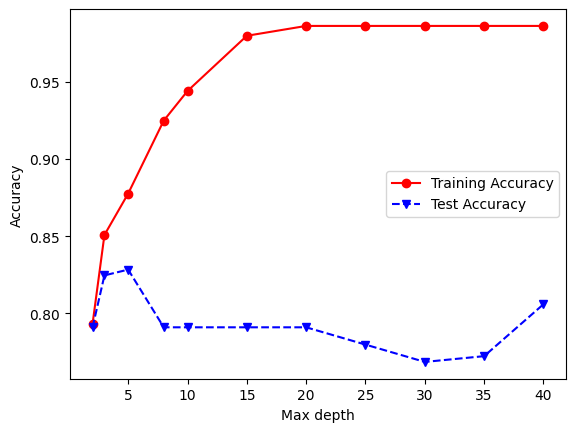

In [ ]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

maxdepths = [2, 3, 5, 8, 10, 15, 20, 25, 30, 35, 40]
trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for index, depth in enumerate(maxdepths):
    clf = DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train_resampled, y_train_resampled)
    y_predTrain = clf.predict(X_train_resampled)
    y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(y_train_resampled, y_predTrain)
    testAcc[index] = accuracy_score(y_test, y_predTest)
    print("Depth = ", depth, ", Training Accuracy = ", trainAcc[index], ", Test Accuracy = ", testAcc[index],
          ", Diff = ", np.abs((trainAcc[index]-testAcc[index])*100), " %")

plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy');

In [ ]:
dt = DecisionTreeClassifier(max_depth = 3, random_state=42)
dt.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
print("Training Accuracy is: ", dt.score(X_train_resampled, y_train_resampled))
print("Testing Accuracy is: ", dt.score(X_test, y_test))
X_test_prediction  = dt.predict(X_test)
print(classification_report(y_test, X_test_prediction))

Training Accuracy is:  0.8507653061224489
Testing Accuracy is:  0.8246268656716418
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       157
           1       0.81      0.76      0.78       111

    accuracy                           0.82       268
   macro avg       0.82      0.81      0.82       268
weighted avg       0.82      0.82      0.82       268



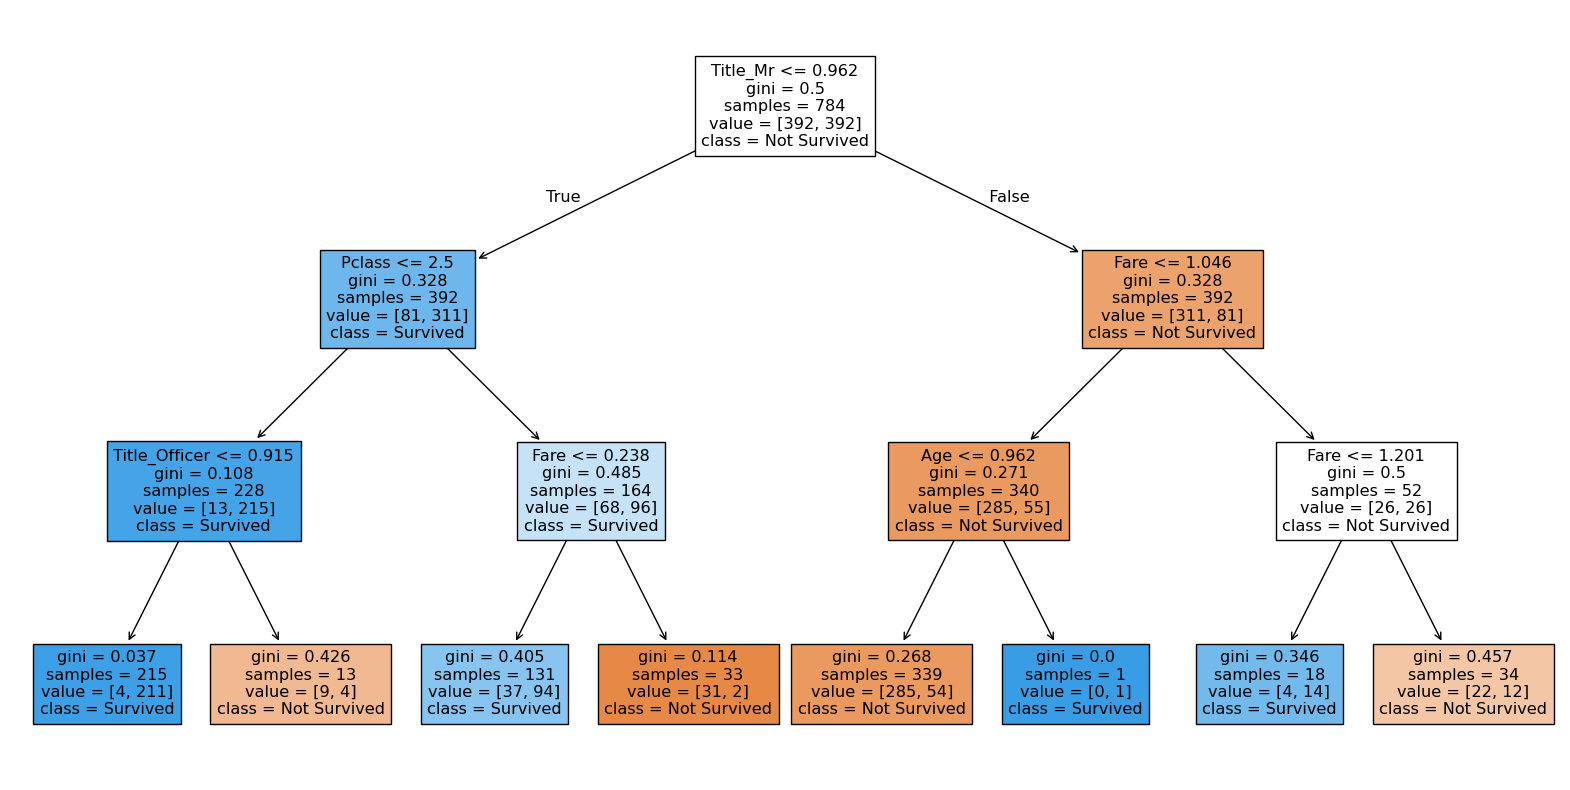

In [ ]:
from sklearn import tree

plt.figure(figsize=(20,10))
tree.plot_tree(dt, feature_names=X_train.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

model = DecisionTreeClassifier(max_depth = 3, random_state=42)

cv_scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {np.mean(cv_scores):.4f}")

Cross-Validation Scores: [0.82165605 0.80254777 0.84713376 0.8343949  0.87179487]
Mean Accuracy: 0.8355


Confusion Matrix:

          Predicted 0  Predicted 1
Actual 0          137           20
Actual 1           27           84


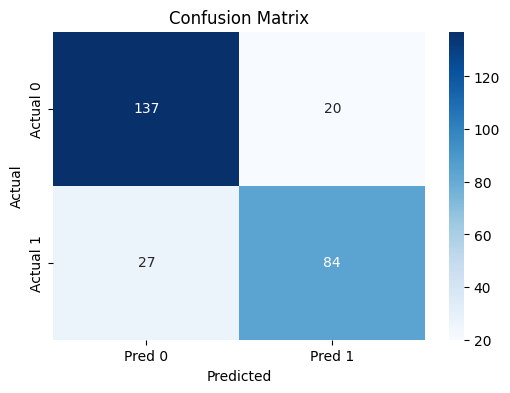

In [ ]:
y_pred = dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print(f"Confusion Matrix:\n")
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
print(cm_df)


plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Pred 0', 'Pred 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

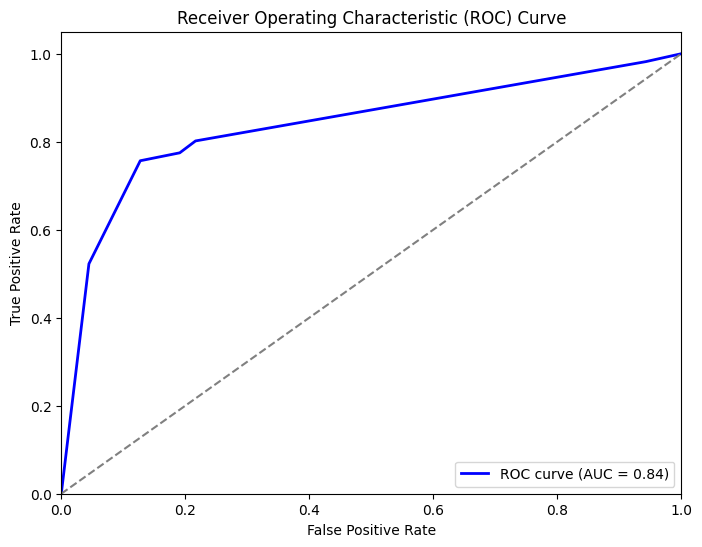

In [ ]:
from sklearn.metrics import roc_curve, auc

y_prob = dt.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# DECISION TREE (BAGGING)

In [ ]:
from sklearn.ensemble import BaggingClassifier

dtree = DecisionTreeClassifier(max_depth=4)

bagging_model = BaggingClassifier(
    estimator=dtree,
    n_estimators=100,
    max_samples=0.8,
    max_features=1.0,
    bootstrap=True,
    random_state=42
)

bagging_model.fit(X_train_resampled, y_train_resampled)

y_pred = bagging_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8097014925373134
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       157
           1       0.78      0.76      0.77       111

    accuracy                           0.81       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



In [ ]:
model = BaggingClassifier(
    estimator=dtree,
    n_estimators=100,
    max_samples=0.8,
    max_features=1.0,
    bootstrap=True,
    random_state=42
)

cv_scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {np.mean(cv_scores):.4f}")

Cross-Validation Scores: [0.8343949  0.79617834 0.85350318 0.84076433 0.87820513]
Mean Accuracy: 0.8406


Confusion Matrix:

          Predicted 0  Predicted 1
Actual 0          133           24
Actual 1           27           84


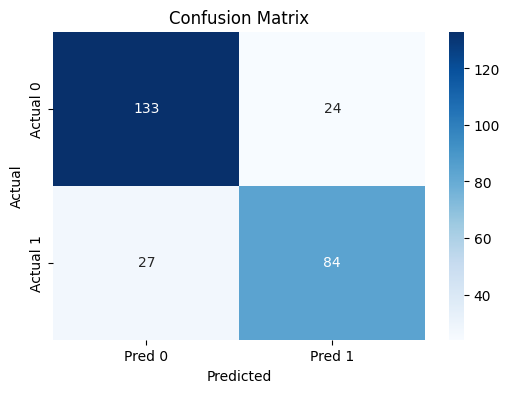

In [ ]:
y_pred = bagging_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print(f"Confusion Matrix:\n")
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
print(cm_df)


plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Pred 0', 'Pred 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

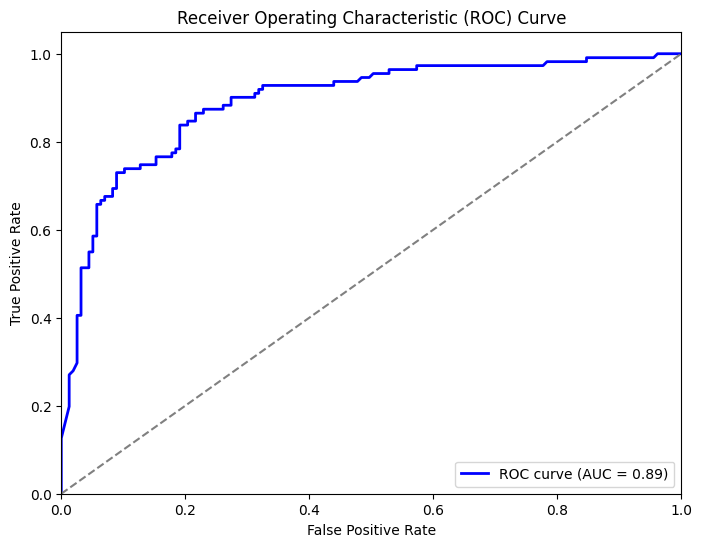

In [ ]:
y_prob = bagging_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# MODELING : RANDOM FOREST

Hyperparameter Tuning using GridSearchCV:

bootstrap=False, max_depth= 780, max_features= 'log2', min_samples_leaf= 3, min_samples_split= 100, n_estimators= 300

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(bootstrap=False, max_depth= 780, max_features= 'log2', min_samples_leaf= 3, min_samples_split= 100, n_estimators= 300)

rf.fit(X_train_resampled, y_train_resampled)
y_pred = rf.predict(X_test)

print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test, y_pred))

Accuracy Score 0.8246268656716418
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       157
           1       0.80      0.77      0.78       111

    accuracy                           0.82       268
   macro avg       0.82      0.82      0.82       268
weighted avg       0.82      0.82      0.82       268



In [ ]:
model = RandomForestClassifier(bootstrap=False, max_depth= 780, max_features= 'log2', min_samples_leaf= 3, min_samples_split= 100, n_estimators= 300)

cv_scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {np.mean(cv_scores):.4f}")

Cross-Validation Scores: [0.78980892 0.77070064 0.77707006 0.8089172  0.87820513]
Mean Accuracy: 0.8049


Confusion Matrix:

          Predicted 0  Predicted 1
Actual 0          136           21
Actual 1           26           85


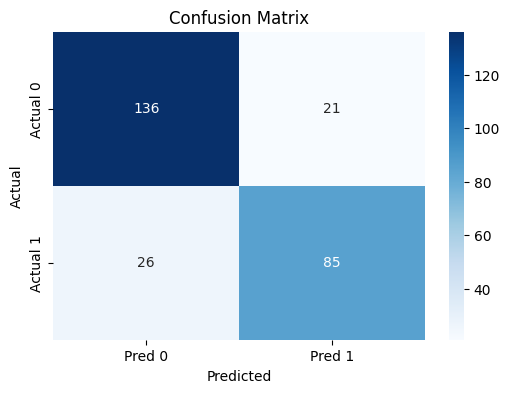

In [ ]:
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print(f"Confusion Matrix:\n")
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
print(cm_df)


plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Pred 0', 'Pred 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

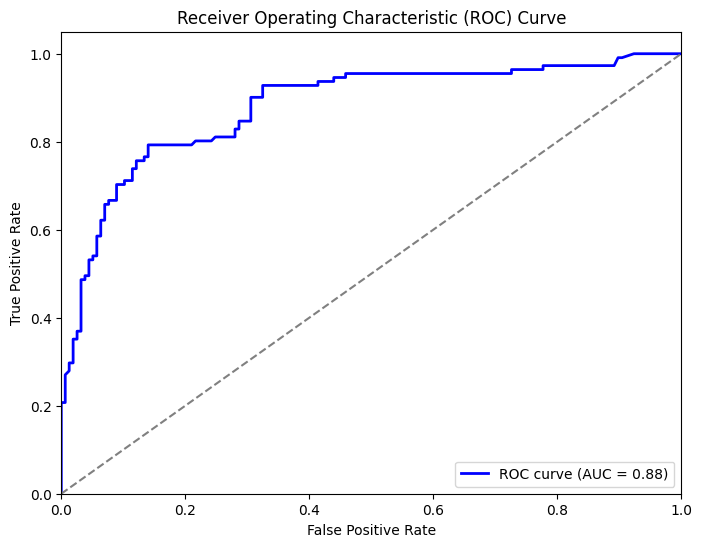

In [ ]:
y_prob = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# MODELING : ADABOOST

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

adaboost = AdaBoostClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0]
}

grid_search = GridSearchCV(adaboost, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train_resampled, y_train_resampled)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'learning_rate': 1.0, 'n_estimators': 100}
Best Score: 0.8214845663890251


In [ ]:
adaboost = AdaBoostClassifier(n_estimators=100, learning_rate=1.0)

adaboost.fit(X_train_resampled, y_train_resampled)
y_pred = adaboost.predict(X_test)

print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(classification_report(y_test, y_pred))

Accuracy Score 0.7985074626865671
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       157
           1       0.75      0.77      0.76       111

    accuracy                           0.80       268
   macro avg       0.79      0.80      0.79       268
weighted avg       0.80      0.80      0.80       268



In [ ]:
from sklearn.model_selection import cross_val_score

model = AdaBoostClassifier(n_estimators=100, learning_rate=1.0)

cv_scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {np.mean(cv_scores):.4f}")

Cross-Validation Scores: [0.8089172  0.79617834 0.79617834 0.84076433 0.86538462]
Mean Accuracy: 0.8215


Confusion Matrix:

          Predicted 0  Predicted 1
Actual 0          128           29
Actual 1           25           86


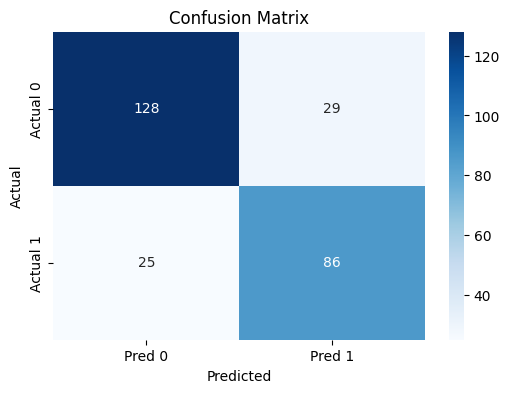

In [ ]:
y_pred = adaboost.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print(f"Confusion Matrix:\n")
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
print(cm_df)


plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Pred 0', 'Pred 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

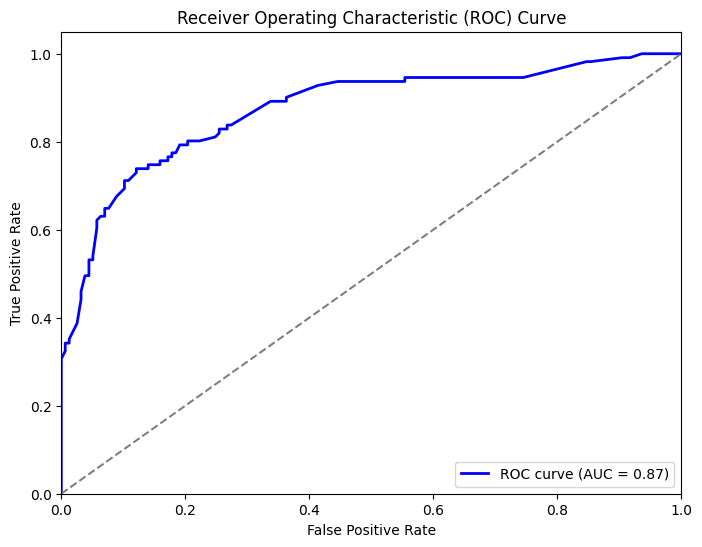

In [ ]:
y_prob = adaboost.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# STACKING

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

base_learners = [
    ('dt', DecisionTreeClassifier(max_depth=4)),
    ('rf', RandomForestClassifier(bootstrap=True, max_depth= 780, max_features= 'log2', min_samples_leaf= 3, min_samples_split= 100, n_estimators= 300)),
    ('xgb', XGBClassifier(eval_metric='logloss'))
]

final_learner = LogisticRegression(C=10, penalty='l2', solver='liblinear')

stack_model = StackingClassifier(estimators=base_learners, final_estimator=final_learner)

stack_model.fit(X_train_resampled, y_train_resampled)

y_pred = stack_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8059701492537313
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       157
           1       0.77      0.76      0.76       111

    accuracy                           0.81       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



In [ ]:
from sklearn.model_selection import cross_val_score

model = StackingClassifier(estimators=base_learners, final_estimator=final_learner)

cv_scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {np.mean(cv_scores):.4f}")

Cross-Validation Scores: [0.82165605 0.8089172  0.82802548 0.87261146 0.88461538]
Mean Accuracy: 0.8432


Confusion Matrix:

          Predicted 0  Predicted 1
Actual 0          132           25
Actual 1           27           84


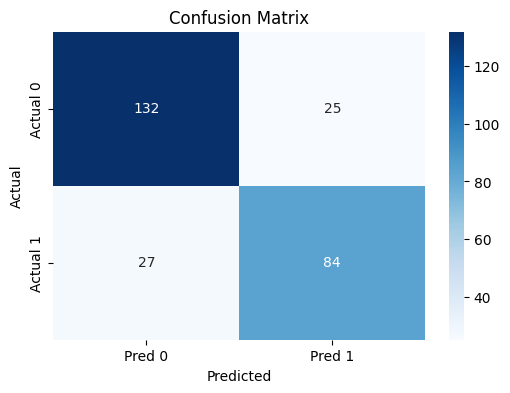

In [ ]:
y_pred = stack_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print(f"Confusion Matrix:\n")
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
print(cm_df)


plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Pred 0', 'Pred 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

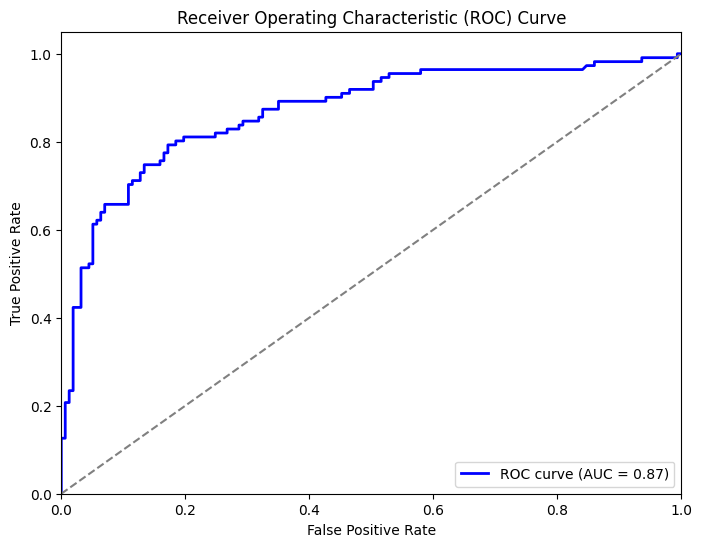

In [ ]:
y_prob = stack_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# CONCLUSION

From the 5 different models trained, Random Forest and Decision Tree model scored the highest accuracy score of 82,46%. This is because the training dataset dimensionality isn't too vast and simple, making it a more stable fit to simpler model rather than highly-complex models that may start to overfit into the training data. Random Forest can also perform well due to it's structure of averaging between the decision trees made, taking account of feature importance accross dataset. In terms of validation both the 5-fold cross validation also shown stable scores across all fold in each model, proving the model's stability accross each data split.